## 🎯 Objectif de la partie non supervisée : LDA (Modélisation thématique)

---

### 🧾 Contexte général

Sur Stack Overflow, les utilisateurs posent des questions techniques. Chaque question est associée manuellement à des *tags* (par exemple : `python`, `api`, `list`, `pandas`, etc.).

Cependant, beaucoup d’utilisateurs, notamment débutants, ne savent pas toujours bien choisir leurs tags.

L’objectif de cette partie est donc de construire un système intelligent capable de :

> 🔍 **Découvrir automatiquement les grands thèmes (topics)** présents dans les questions, sans connaître à l’avance les bons tags.

C’est précisément là qu’intervient l’approche non supervisée avec **LDA (Latent Dirichlet Allocation)**.

---

### 🎯 Objectif spécifique

👉 Utiliser un **modèle non supervisé** pour **identifier automatiquement les sujets récurrents** abordés dans un grand nombre de questions Stack Overflow, sans utiliser les tags manuels.

---

### 💡 Pourquoi une approche non supervisée ?

- On **n’utilise pas les tags existants**
- On **laisse l’algorithme découvrir lui-même** les thématiques naturelles du texte
- Cela permet de :
  - 🔖 **Proposer automatiquement des tags** pour de nouvelles questions
  - 🧠 **Repérer les sujets fréquents**
  - 🧩 **Segmenter le corpus** par thème (ex : "API", "Base de données", "Web scraping", etc.)

---

### 🧠 Ce que fait concrètement LDA

- Analyse le texte de chaque question
- Identifie des groupes de mots souvent utilisés ensemble → appelés **topics**
- Chaque **topic** est une **liste de mots représentatifs**
- Chaque **question** est vue comme un **mélange de plusieurs topics** avec des proportions

📌 **Exemple :**  
Une question peut être associée à :
- 70 % au topic `"string manipulation"`  
- 30 % au topic `"file I/O"`

---

### 🔧 Pourquoi c’est utile dans ce projet

- 📊 Analyse des données textuelles **à grande échelle**
- 🔍 Proposes un **modèle interprétable** (topics lisibles via leurs mots-clés)
- 🧠 Je mets en place un **système d’aide à la suggestion de tags**
- 👁️ je peux **visualiser les thèmes** (WordCloud, pyLDAvis…)

---


> Le but de cette partie est de découvrir, **sans supervision**, les **thématiques les plus fréquentes** dans les questions Stack Overflow à l’aide d’un algorithme LDA.  
> Cela permet de **regrouper les questions par sujet**, **analyser leur contenu** et **proposer des suggestions de tags**, sans avoir besoin d’un modèle supervisé.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Charger les données déjà nettoyées
data = pd.read_csv("clean_questions.csv")  # ou adapter selon ton fichier
data.head()


,Id,Full_Text,Clean_Tags
0,11227809,process sorted array fast process unsorted arr...,"['cpu-architecture', 'java', 'c++', 'performan..."
1,2003505,delete git branch locally remotely fail attemp...,"['git-branch', 'git-remote', 'version-control'..."
2,1642028,operator read hide feature dark corner cstl co...,"['standards-compliance', 'operators', 'c++', '..."
3,1125968,force git pull overwrite local file force over...,"['version-control', 'git-pull', 'overwrite', '..."
4,79923,stack heap stack heap locate physically comput...,"['memory-management', 'dynamic-memory-allocati..."


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=5,
    stop_words='english'
)

X_counts = vectorizer.fit_transform(data['Full_Text'])


## 🔍 Modélisation Non Supervisée – LDA (Latent Dirichlet Allocation)

LDA est une méthode non supervisée de modélisation thématique, qui permet d'identifier automatiquement les grands sujets (topics) présents dans les questions Stack Overflow. Chaque document est représenté comme un mélange de topics, chacun ayant un poids.

🔧 Paramètres optimisés :
- Nombre de topics optimal déterminé via coherence score
- Hyperparamètres `alpha` et `eta` ajustés
- Score de cohérence mesuré avec `c_v`

🎯 Résultats :
- Visualisation des top mots par topic
- WordCloud par topic
- Attribution du topic dominant à chaque question
- Visualisation interactive avec pyLDAvis

Ce modèle permet d’identifier les grandes thématiques abordées dans les questions Stack Overflow, sans avoir besoin de tags manuels.


In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

# Tokenisation simple (sans ponctuation)
data['text_tokens'] = data['Full_Text'].apply(lambda x: simple_preprocess(str(x), deacc=True))


In [4]:
# Créer un dictionnaire de tous les mots uniques
id2word = corpora.Dictionary(data['text_tokens'])

# Créer le corpus : liste de sacs de mots (bag-of-words)
corpus = [id2word.doc2bow(text) for text in data['text_tokens']]


In [5]:
from gensim.models import LdaMulticore

lda_model = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    passes=10,
    iterations=100,
    workers=4,
    random_state=42
)

# Afficher les 5 premiers topics
from pprint import pprint
pprint(lda_model.print_topics(num_topics=5))


[(2,
  '0.013*"work" + 0.012*"project" + 0.012*"studio" + 0.012*"run" + '
  '0.011*"android" + 0.010*"try" + 0.008*"code" + 0.008*"visual" + '
  '0.008*"instal" + 0.008*"app"'),
 (3,
  '0.025*"call" + 0.022*"stack" + 0.022*"function" + 0.018*"addrreturn" + '
  '0.016*"array" + 0.010*"like" + 0.009*"use" + 0.008*"return" + 0.008*"way" + '
  '0.007*"var"'),
 (7,
  '0.027*"error" + 0.026*"file" + 0.015*"try" + 0.014*"find" + 0.009*"work" + '
  '0.008*"run" + 0.007*"version" + 0.007*"project" + 0.007*"problem" + '
  '0.006*"use"'),
 (8,
  '0.010*"text" + 0.009*"pod" + 0.009*"return" + 0.008*"view" + 0.008*"image" '
  '+ 0.007*"work" + 0.007*"try" + 0.006*"button" + 0.006*"like" + '
  '0.006*"color"'),
 (9,
  '0.028*"div" + 0.011*"work" + 0.009*"form" + 0.009*"image" + 0.008*"input" + '
  '0.008*"code" + 0.007*"new" + 0.007*"download" + 0.007*"try" + '
  '0.007*"click"')]


In [6]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/opt/conda/lib/python3.11/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.192656 -0.061864       1        1  19.627185
7      0.002007  0.083993       2        1  17.769977
0     -0.058284  0.232632       3        1  10.405147
2      0.101165  0.024400       4        1  10.388964
8      0.111036 -0.161394       5        1   8.396384
4      0.118324  0.197334       6        1   8.281877
9      0.013182 -0.201601       7        1   8.205534
3     -0.144102 -0.165317       8        1   7.153483
1     -0.168820  0.068434       9        1   5.815964
6      0.218147 -0.016618      10        1   3.955485, topic_info=           Term         Freq        Total Category  logprob  loglift
45       import  2550.000000  2550.000000  Default  30.0000  30.0000
986         div  1536.000000  1536.000000  Default  29.0000  29.0000
298         npm  1129.000000  1129.000000  Default  28.0000  28.0000
152        file  5969.000000  5969.000000  Default  27.0000  27.0000
34   dependency  1863.000000  1863.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
286      return   109.052879  3544.857336  Topic10  -5.4119  -0.2514
534         way    96.466284  2461.034261  Topic10  -5.5345  -0.0091
202         use    93.118763  3378.494218  Topic10  -5.5698  -0.3612
64         need    85.008885  2019.607861  Topic10  -5.6609   0.0622
116        find    84.794089  3622.131101  Topic10  -5.6635  -0.5245

[869 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
7893       2  0.986837    aapt
695        1  0.165918  access
695        2  0.164524  access
695        3  0.083656  access
695        4  0.023703  access
...      ...       ...     ...
2378       8  0.002997   xcode
2378       9  0.032967   xcode
36490      6  0.948305    xlam
9544       6  0.959391   xpath
37911     10  0.965174   xslif

[2910 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 1, 3, 9, 5, 10, 4, 2, 7])

### 🔍 Recherche automatique des meilleurs hyperparamètres pour LDA

Une grille de recherche a été effectuée sur :
- Le nombre de topics : de 10 à 30
- Alpha (document-topic) : symmetric / asymmetric
- Eta (mot-topic) : symmetric / auto

Le meilleur modèle a été sélectionné selon le **coherence score** (`c_v`) :

- Nombre de topics : **xx**
- Alpha : **xx**
- Eta : **xx**
- Score de cohérence : **0.xxx**

In [8]:
from gensim.models import CoherenceModel
topics_nb = range(10, 31)
alpha_values = ['symmetric', 'asymmetric']
eta_values = ['symmetric', 'auto']
CS = {}

for alpha in alpha_values:
    cs = {}
    for eta in eta_values:
        scores = []
        for k in topics_nb:
            lda_model = gensim.models.LdaMulticore(
                corpus=corpus,
                id2word=id2word,
                num_topics=k,
                random_state=42,
                passes=10,
                alpha=alpha,
                eta=eta,
                workers=4
            )
            coherence_model = CoherenceModel(model=lda_model, texts=data['text_tokens'],
                                             dictionary=id2word, coherence='c_v')
            coherence = coherence_model.get_coherence()
            scores.append(coherence)
        cs[eta] = scores
    CS[alpha] = cs

Process ForkPoolWorker-1748:
Process ForkPoolWorker-1746:
Process ForkPoolWorker-1745:
Process ForkPoolWorker-1747:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.11/multiprocessing/pool.py", line 109, in worker
    initializer(*initargs)
  File "/opt/conda/lib/python3.11/site-packages/gensim/models/ldamulticore.py", line 346, in worker_e_s

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
legends = []

for alpha in CS:
    for eta in CS[alpha]:
        plt.plot(list(topics_nb), CS[alpha][eta], marker='o')
        legends.append(f"alpha={alpha}, eta={eta}")

plt.xticks(list(topics_nb))
plt.xlabel("Nombre de topics")
plt.ylabel("Score de cohérence (c_v)")
plt.title("Évolution du coherence score selon alpha / eta / topics")
plt.legend(legends, fontsize=10)
plt.grid(True)
plt.show()



In [ ]:
import numpy as np

best_score = 0
best_alpha = None
best_eta = None
best_n_topics = None

for alpha in CS:
    for eta in CS[alpha]:
        scores = CS[alpha][eta]
        max_idx = np.argmax(scores)
        score = scores[max_idx]
        if score > best_score:
            best_score = score
            best_alpha = alpha
            best_eta = eta
            best_n_topics = list(topics_nb)[max_idx]

print("✅ Meilleurs paramètres LDA trouvés automatiquement :")
print(f"• Nombre de topics       = {best_n_topics}")
print(f"• Alpha (document-topic) = {best_alpha}")
print(f"• Eta   (word-topic)     = {best_eta}")
print(f"• Coherence Score (c_v)  = {round(best_score, 4)}")



In [ ]:
lda_final = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=best_n_topics,
    alpha=best_alpha,
    eta=best_eta,
    passes=10,
    workers=4,
    random_state=42
)


In [16]:
# Pour chaque document, on récupère le topic avec la plus forte probabilité
dominant_topics = [max(doc, key=lambda x: x[1])[0] for doc in lda_final[corpus]]
data['Dominant_Topic'] = dominant_topics

# Affichage des 5 premières
data[['Full_Text', 'Dominant_Topic']].head()


,Full_Text,Dominant_Topic
0,process sorted array fast process unsorted arr...,14
1,delete git branch locally remotely fail attemp...,2
2,operator read hide feature dark corner complet...,0
3,force git pull overwrite local file force over...,2
4,stack heap stack heap locate physically comput...,6


In [17]:
# pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_final, corpus, id2word, mds='mmds')
vis


/opt/conda/lib/python3.11/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.095940 -0.111288       1        1  13.970121
1      0.128670 -0.115983       2        1   9.543375
10    -0.050280 -0.301124       3        1   8.709266
3      0.018883  0.229907       4        1   8.433157
9      0.055573  0.053974       5        1   7.290436
2     -0.113920  0.033781       6        1   6.894485
6     -0.247178 -0.113428       7        1   5.573837
7     -0.119027  0.259697       8        1   5.422756
5      0.177400  0.194252       9        1   5.101346
4      0.213039  0.023166      10        1   5.031932
12    -0.046195  0.121267      11        1   4.711517
13     0.247608 -0.135414      12        1   4.647801
11     0.099803  0.270313      13        1   4.476183
15     0.106678 -0.274141      14        1   3.927484
14    -0.147737 -0.185745      15        1   3.481106
8     -0.227377  0.050766      16        1   2.785195, topic_info=           Term         Freq        Total Category  logprob  loglift
116        file  6229.000000  6229.000000  Default  30.0000  30.0000
31       import  3088.000000  3088.000000  Default  29.0000  29.0000
52       public  3351.000000  3351.000000  Default  28.0000  28.0000
23   dependency  1793.000000  1793.000000  Default  27.0000  27.0000
85        error  7400.000000  7400.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
455        want    70.459362  2870.863175  Topic16  -5.2467  -0.1265
449     project    64.144580  2427.038036  Topic16  -5.3406  -0.0524
19         code    63.821839  4201.416587  Topic16  -5.3456  -0.6062
772    solution    60.578294  1555.103435  Topic16  -5.3978   0.3355
116        file    60.161030  6229.995757  Topic16  -5.4047  -1.0593

[1245 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3623     15  0.827638  abnormally
6886     13  0.787871     aborted
1788      2  0.907795    abstract
1788     12  0.037205    abstract
1788     15  0.007441    abstract
...     ...       ...         ...
1722      6  0.026479         zip
1722      7  0.052958         zip
1722      8  0.754651         zip
1722     12  0.039718         zip
1722     16  0.092676         zip

[5217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 11, 4, 10, 3, 7, 8, 6, 5, 13, 14, 12, 16, 15, 9])

In [18]:
from pprint import pprint

print("\nTop mots par topic :")
pprint(lda_final.print_topics(num_topics=best_n_topics, num_words=10))



Top mots par topic :
[(0,
  '0.020*"way" + 0.019*"use" + 0.018*"like" + 0.012*"want" + 0.012*"code" + '
  '0.011*"know" + 0.010*"need" + 0.010*"time" + 0.009*"work" + '
  '0.008*"question"'),
 (1,
  '0.044*"public" + 0.044*"class" + 0.026*"string" + 0.019*"method" + '
  '0.018*"return" + 0.013*"private" + 0.012*"like" + 0.012*"bean" + '
  '0.012*"property" + 0.012*"test"'),
 (2,
  '0.043*"line" + 0.041*"file" + 0.027*"python" + 0.019*"import" + 0.018*"try" '
  '+ 0.016*"function" + 0.015*"work" + 0.015*"module" + 0.014*"error" + '
  '0.013*"find"'),
 (3,
  '0.062*"error" + 0.028*"build" + 0.024*"find" + 0.023*"project" + '
  '0.020*"try" + 0.015*"file" + 0.014*"fail" + 0.014*"run" + 0.014*"module" + '
  '0.014*"main"'),
 (4,
  '0.086*"import" + 0.031*"return" + 0.024*"error" + 0.022*"request" + '
  '0.019*"try" + 0.014*"function" + 0.013*"class" + 0.013*"react" + '
  '0.012*"export" + 0.011*"file"'),
 (5,
  '0.046*"stack" + 0.040*"error" + 0.033*"call" + 0.026*"run" + 0.026*"fail" + '

##  Interprétation simple des topics LDA

| Topic | Mots clés principaux                            | Interprétation |
|-------|--------------------------------------------------|----------------|
| 0     | way, use, like, want, need, code                | Questions générales sur **comment utiliser ou faire quelque chose** |
| 1     | class, public, method, return, string           | **Programmation orientée objet**, surtout en Java |
| 2     | file, line, python, import, error               | **Python** et lecture de **fichiers** |
| 3     | error, build, project, run, fail                | **Erreurs de compilation** ou d’exécution |
| 4     | import, error, request, react, export           | Problèmes avec les **imports** ou les **API web** |
| 5     | stack, error, exception, android, task          | **Erreurs Android**, exceptions, plantages |
| 6     | table, row, column, query, select               | **Base de données** (SQL) |
| 7     | file, server, command, directory, connect       | Problèmes côté **serveur ou système de fichiers** |
| 8     | map, result, set, find                          | **Structures de données** |
| 9     | server, error, user, password, port             | **Connexion au serveur** ou authentification |
|10     | div, page, button, input, form                  | **Développement web** (HTML, CSS, JS) |
|11     | dependency, version, package, build             | Problèmes de **dépendances** ou de versions |
|12     | studio, visual, project, add, code              | Problèmes dans **Visual Studio** |
|13     | image, string, return, null, override           | **Interface Android / objets Java** |
|14     | date, time, format, size, sort                  | **Manipulation de dates**, formats et tris |
|15     | array, key, value, object, return               | Travail avec des **tableaux, objets, dictionnaires** |


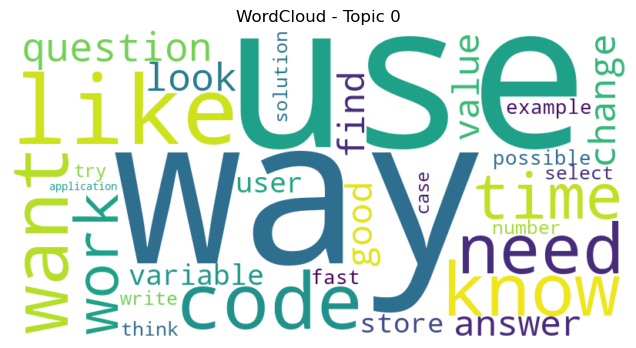

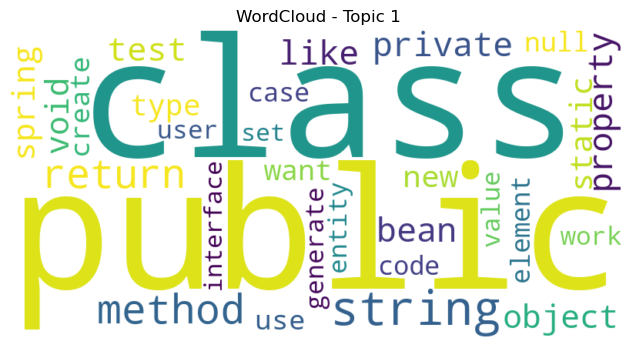

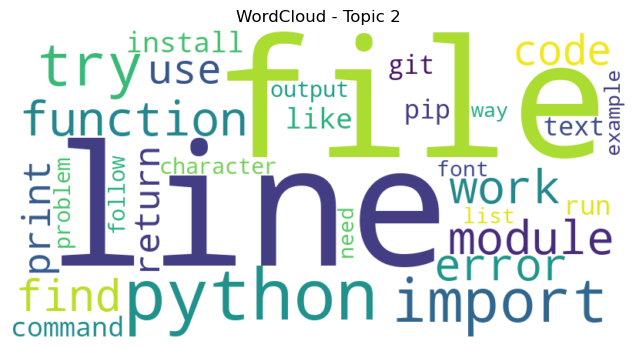

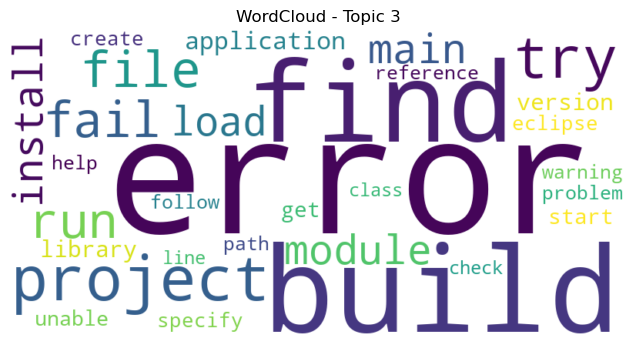

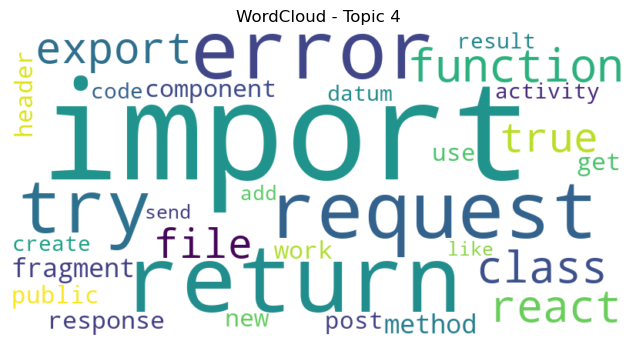

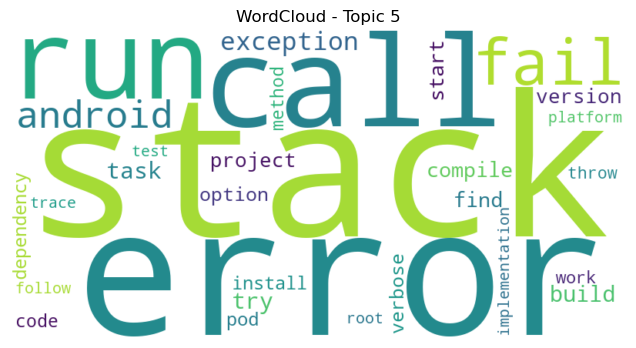

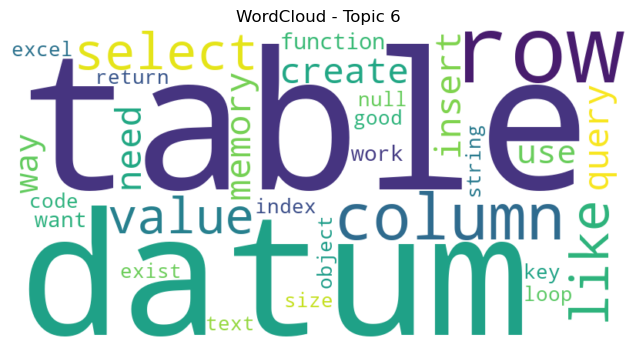

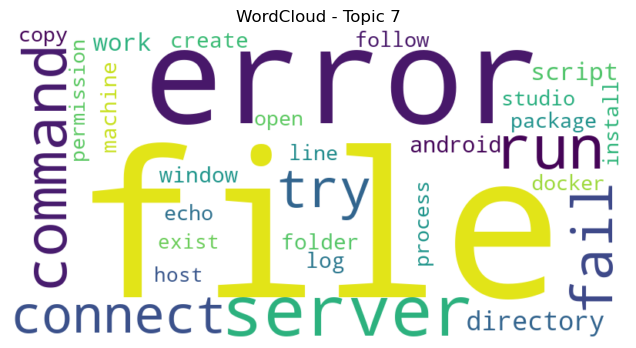

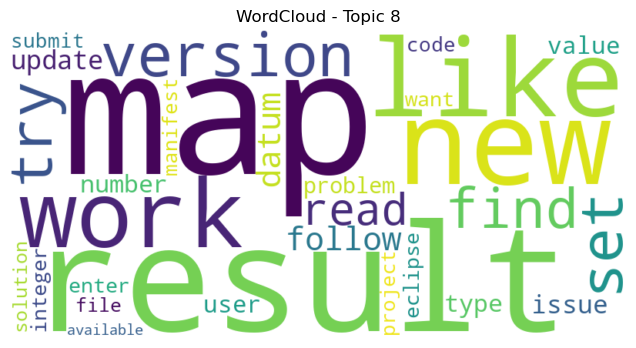

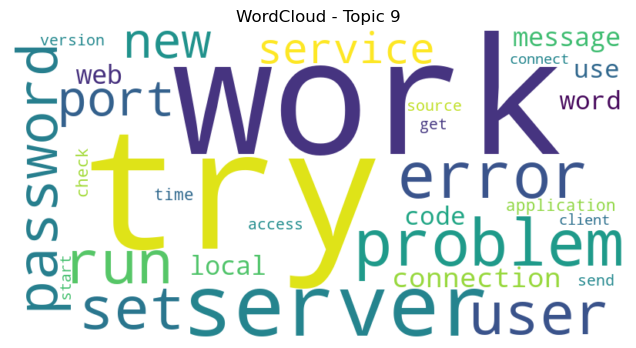

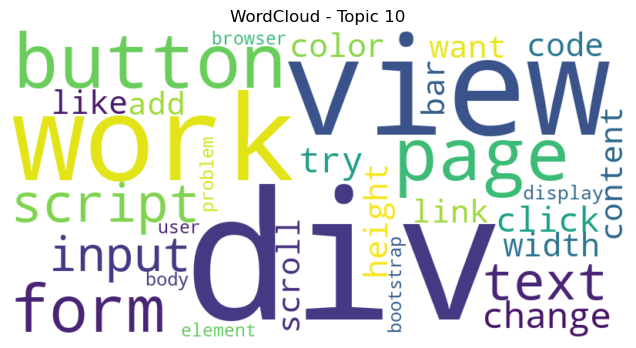

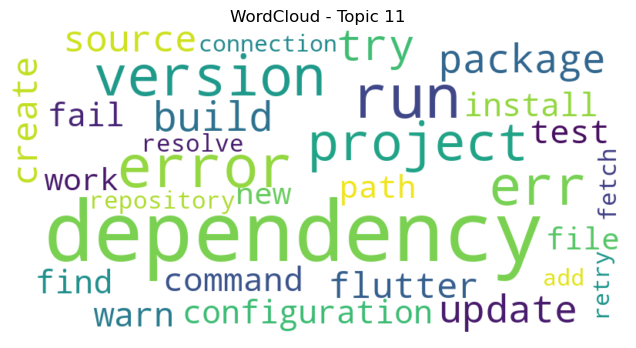

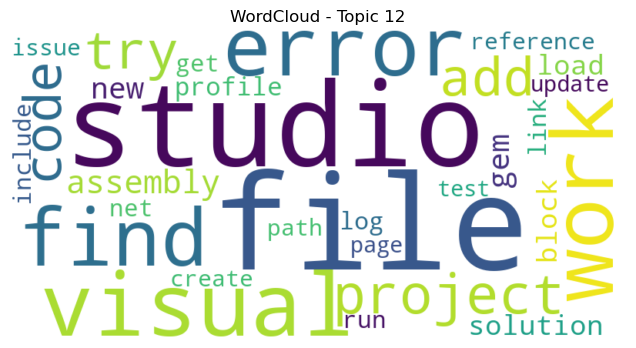

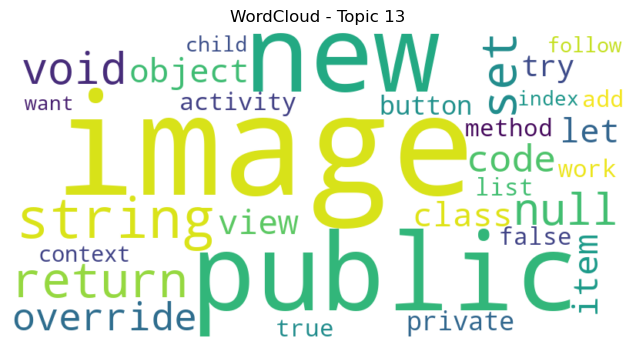

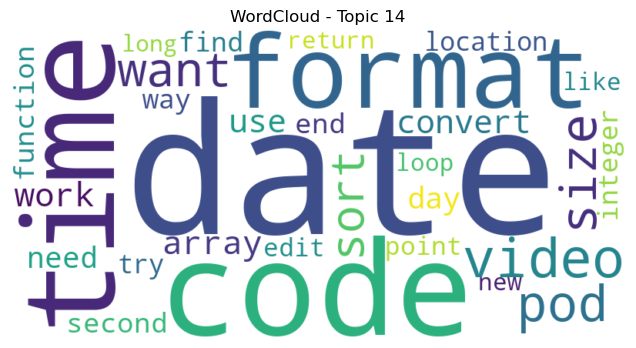

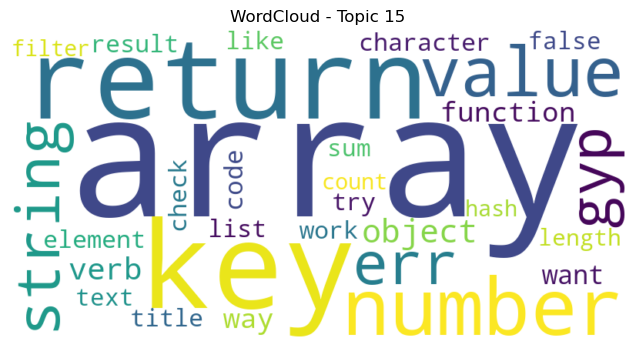

In [21]:
from wordcloud import WordCloud

for topic_id in range(best_n_topics):
    plt.figure(figsize=(8, 4))
    topic_words = dict(lda_final.show_topic(topic_id, topn=30))
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Topic {topic_id}")
    plt.show()


NMF 

### 🎯 À quoi sert ce regroupement par topics ?

Grâce à l’approche non supervisée avec LDA, j’ai pu regrouper automatiquement les questions Stack Overflow en plusieurs grands thèmes récurrents. Chaque groupe (ou “topic”) représente un ensemble de mots fréquemment utilisés ensemble, ce qui reflète un type de problème ou de sujet souvent abordé.

Ce regroupement thématique a plusieurs intérêts concrets :

- ✅ **Classer automatiquement les questions par sujet**  
  Chaque nouvelle question peut être analysée pour détecter à quel topic elle appartient majoritairement. Cela permet de la classer immédiatement dans une catégorie thématique sans intervention humaine (ex : "fichiers", "API", "base de données", etc.).

- ✅ **Proposer des tags intelligents automatiquement**  
  Une fois le topic dominant détecté pour une question, je peux lui associer des mots-clés typiques du sujet concerné. Par exemple, si le modèle identifie un topic contenant les mots `query`, `table`, `select`, je peux suggérer des tags comme `sql`, `database`, `postgresql` de manière pertinente.

- ✅ **Comprendre les types de problèmes que posent les utilisateurs**  
  Ce travail m’a aussi permis de mieux visualiser les grands domaines de difficulté ou d’intérêt rencontrés sur Stack Overflow : développement web, erreurs de compilation, gestion de fichiers, interactions avec des serveurs, etc.  
  Cela apporte une vue d’ensemble utile pour structurer, filtrer ou même recommander du contenu.

En résumé, la modélisation thématique aide à **structurer automatiquement un grand volume de texte non étiqueté**, à **organiser les données de manière compréhensible** et à **améliorer l’expérience utilisateur** via des suggestions adaptées.


In [22]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer


In [24]:
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=5
)

X_tfidf = vectorizer.fit_transform(data['Full_Text'])


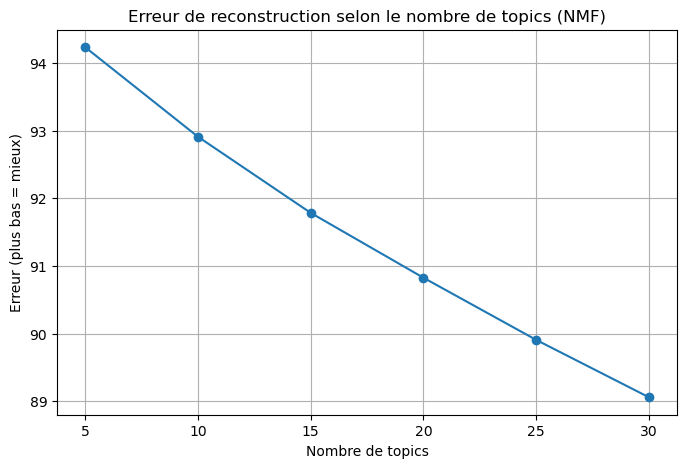

✅ Meilleur nombre de topics trouvé pour NMF : 30


In [25]:
import matplotlib.pyplot as plt

# Liste des valeurs à tester
topic_range = range(5, 31, 5)
errors = []

for n_topics in topic_range:
    nmf = NMF(n_components=n_topics, init='nndsvd', random_state=42, max_iter=500)
    W = nmf.fit_transform(X_tfidf)
    errors.append(nmf.reconstruction_err_)

# Affichage
plt.figure(figsize=(8, 5))
plt.plot(topic_range, errors, marker='o')
plt.title("Erreur de reconstruction selon le nombre de topics (NMF)")
plt.xlabel("Nombre de topics")
plt.ylabel("Erreur (plus bas = mieux)")
plt.grid(True)
plt.show()

# Meilleur nombre de topics
best_nmf_k = topic_range[errors.index(min(errors))]
print(f"✅ Meilleur nombre de topics trouvé pour NMF : {best_nmf_k}")


In [26]:
# Nombre de topics à ajuster selon ton test
n_topics = 30

nmf_model = NMF(n_components=n_topics, init='nndsvd', random_state=42, max_iter=500)
nmf_topics = nmf_model.fit_transform(X_tfidf)


In [27]:
# Fonction pour afficher les topics de manière lisible
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" + ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("")

# Afficher les topics
display_topics(nmf_model, vectorizer.get_feature_names_out(), no_top_words=10)


Topic 0:
server + request + connect + connection + port + service + web + application + send + client

Topic 1:
use + way + like + good + know + code + need + method + want + difference

Topic 2:
public + class + void + private + new + static + method + return + override + extend

Topic 3:
file + directory + folder + read + path + copy + open + create + excel + git

Topic 4:
import + module + export + react + component + path + try + default + notebook + return

Topic 5:
python + module + pip + print + anaconda + library + script + selenium + panda + program

Topic 6:
image + size + load + display + width + save + background + resize + height + add

Topic 7:
error + fail + try + build + code + follow + message + run + load + module

Topic 8:
table + column + select + row + query + datum + insert + panda + join + cell

Topic 9:
array + loop + element + sort + multidimensional + key + way + index + fast + like

Topic 10:
string + character + null + char + return + contain + check + split

| 🧩 Topic | 📝 Interprétation probable                                                      |
| -------- | ------------------------------------------------------------------------------- |
| **0**    | Connexion serveur / réseau (`server`, `port`, `client`, `connect`)              |
| **1**    | Questions générales / bonnes pratiques (`use`, `way`, `method`, `need`)         |
| **2**    | Programmation Java orientée objet (`class`, `public`, `override`, `static`)     |
| **3**    | Manipulation de fichiers / répertoires (`file`, `directory`, `read`, `git`)     |
| **4**    | Développement React / JS modules (`import`, `react`, `component`, `notebook`)   |
| **5**    | Python et outils (`python`, `pip`, `script`, `anaconda`, `selenium`)            |
| **6**    | Traitement d’images (`image`, `resize`, `display`, `width`, `height`)           |
| **7**    | Messages d’erreurs / plantages (`error`, `fail`, `run`, `module`)               |
| **8**    | Base de données SQL / pandas (`table`, `row`, `query`, `join`)                  |
| **9**    | Tableaux / boucles (`array`, `loop`, `index`, `element`, `sort`)                |
| **10**   | Manipulation de chaînes (`string`, `split`, `replace`, `null`, `char`)          |
| **11**   | Installation de paquets / dépendances (`install`, `version`, `pip`, `package`)  |
| **12**   | Web design avec Bootstrap (`div`, `modal`, `width`, `center`, `element`)        |
| **13**   | Dates / formats de temps (`date`, `format`, `time`, `month`, `range`)           |
| **14**   | Fonctions / booléens (`function`, `parameter`, `true`, `false`, `result`)       |
| **15**   | Styles CSS et couleurs (`color`, `style`, `background`, `border`, `white`)      |
| **16**   | Interfaces mobiles ou MVC (`view`, `controller`, `layout`, `scroll`, `present`) |
| **17**   | Formulaires et validation (`input`, `form`, `password`, `submit`)               |
| **18**   | Développement mobile (Android / Flutter) (`android`, `emulator`, `studio`)      |
| **19**   | Texte et alignement UI (`text`, `label`, `font`, `align`, `center`)             |
| **20**   | Objets / références en code (`object`, `property`, `instance`, `class`)         |
| **21**   | Listes et sélection d’éléments (`list`, `element`, `remove`, `duplicate`)       |
| **22**   | Tests unitaires et exécution (`test`, `unit`, `mock`, `jest`, `output`)         |
| **23**   | Spring / Java / dépendances (`dependency`, `repository`, `compile`, `bean`)     |
| **24**   | IDE : Visual Studio / Eclipse (`visual`, `studio`, `solution`, `reference`)     |
| **25**   | Boutons et événements (`button`, `click`, `icon`, `hide`, `event`)              |
| **26**   | Ligne de commande / exécution (`command`, `line`, `shell`, `output`)            |
| **27**   | Conversions numériques (`convert`, `float`, `double`, `integer`, `store`)       |
| **28**   | Dictionnaires et variables (`key`, `value`, `default`, `field`)                 |
| **29**   | Navigation et événements web (`page`, `browser`, `scroll`, `chrome`, `event`)   |


In [28]:
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess

# Tokenisation de tes textes
texts_tokenized = [simple_preprocess(doc) for doc in data['Full_Text']]

# Dictionnaire Gensim
id2word_nmf = Dictionary(texts_tokenized)

# Corpus au format BoW
corpus_nmf = [id2word_nmf.doc2bow(text) for text in texts_tokenized]

# Topics du modèle NMF (extraits manuellement)
nmf_topics = []
feature_names = vectorizer.get_feature_names_out()

for topic in nmf_model.components_:
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    nmf_topics.append(top_words)

# Coherence score
coherence_nmf = CoherenceModel(
    topics=nmf_topics,
    texts=texts_tokenized,
    dictionary=id2word_nmf,
    coherence='c_v'
).get_coherence()

print(f"✅ Coherence Score du modèle NMF : {round(coherence_nmf, 4)}")


✅ Coherence Score du modèle NMF : 0.5619
